This notebook shows experiment results with the RBS system

# comparing different market conditions

In [2]:
# Import a set of default parameters
from IPython.display import display
from model.utility.default_parameters import default_params1 as params
# Import a default initial state
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)
# params["demand_factor"] = [0.07]#[0.5,0.1]#
# params["supply_factor"] = [-.07]#[-.01,-0.1]#

In [5]:
print(params['bond_create_schedule'])

[   start_days                                              bonds
0           1  [OHMbond(total_amount=1000000.0, expiration_du...]


## Run Experiment

You can set two parameters for the simulation model at this phase. The number of monte carlo runs (number_runs) and the number of timesteps for each run (number_steps). Then you load the experiment with load_config, get raw output from running the experiment, and finally apply to post-processing function to parse the data into a smaller and enhanced dataframe.

In [6]:
from model.run import load_config, run, post_processing

# Set the params for runs and timesteps
number_runs = 2
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 19, 2, 63)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 19, 2, 63)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 5.77s


## Visualization

There are functions to easily visualize some of the results of the cadCAD runs. Below we will show some graphics from the monte carlo simulations.

In [8]:
from model.utility.visualization import plot_all_sims,plot_grouped_variables_average,plot_multivars_grouped_average


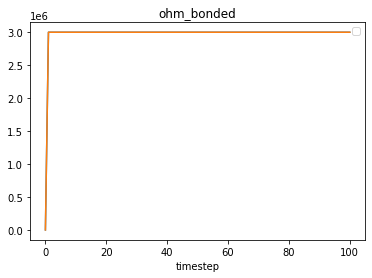

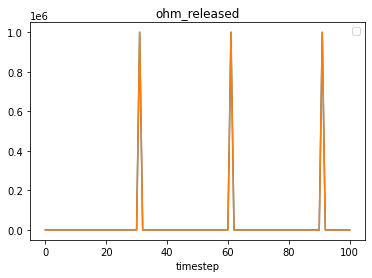

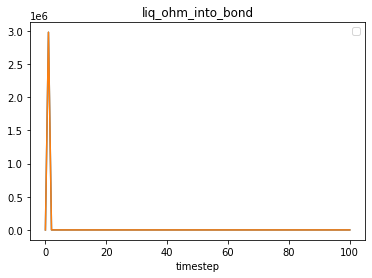

In [14]:

plot_all_sims(['ohm_bonded','ohm_released','liq_ohm_into_bond'],df)

With the current bond creation, 3 bonds are created at the same time thus a sharp increase of "ohm_bonded". Then af 30,60,and 90 each of the bonds got released. 

The "liq_ohm_into_bond" is a one-time movement at the bond sale date. It's slightly smaller than the total amount of "ohm_bonded" because of people buy bonds at a discounted rate.